In [7]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

# fetch dataset 
obesidad = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = obesidad.data.features 
y = obesidad.data.targets 

# ver tipos de datos
X.dtypes


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [19]:
# Identificar columnas categóricas y numéricas
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", 
                    "SMOKE", "SCC", "CALC", "MTRANS"]
numerical_cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE", "Height", "Weight"]

# Crear el transformador para preprocesar las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_cols),  # Escalado de variables numéricas
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OHE para variables categóricas
    ],
    remainder="drop"  # Eliminar cualquier columna no especificada (por seguridad)
)

# Aplicar la transformación al dataset X
X_processed = preprocessor.fit_transform(X)

# Convertir el resultado a un DataFrame con nombres de columnas adecuados
# Para las columnas categóricas, recuperar los nombres después de OHE
ohe_categories = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
processed_columns = numerical_cols + list(ohe_categories)
X_processed = pd.DataFrame(X_processed, columns=processed_columns)

# Verificar el resultado
print(X_processed.head())

        Age  FCVC       NCP  CH2O       FAF  TUE    Height    Weight  \
0  0.148936   0.5  0.666667   0.5  0.000000  0.5  0.320755  0.186567   
1  0.148936   1.0  0.666667   1.0  1.000000  0.0  0.132075  0.126866   
2  0.191489   0.5  0.666667   0.5  0.666667  0.5  0.660377  0.283582   
3  0.276596   1.0  0.666667   0.5  0.666667  0.0  0.660377  0.358209   
4  0.170213   0.5  0.000000   0.5  0.000000  0.0  0.622642  0.379104   

   Gender_Female  Gender_Male  ...  SCC_yes  CALC_Always  CALC_Frequently  \
0            1.0          0.0  ...      0.0          0.0              0.0   
1            1.0          0.0  ...      1.0          0.0              0.0   
2            0.0          1.0  ...      0.0          0.0              1.0   
3            0.0          1.0  ...      0.0          0.0              1.0   
4            0.0          1.0  ...      0.0          0.0              0.0   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0             0.0      1

In [39]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def optimise_k_medoids(data, max_k, metric='manhattan'):

    clusters = []
    costs = []
    
    for k in range(1, max_k):
        kmedoids = KMedoids(n_clusters=k, metric=metric, random_state=42)
        kmedoids.fit(data)
        clusters.append(k)
        costs.append(kmedoids.inertia_)  # Costo total equivalente

    # Graficar los resultados
    plt.figure(figsize=(10, 5))
    plt.plot(clusters, costs, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Cost Total (Dissimilarity)")
    plt.title(f"KMedoids Optimization ({metric.capitalize()} Distance)")
    plt.grid(True)
    plt.show()


c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\juell\.conda\envs\Obesidad\lib\site-pac

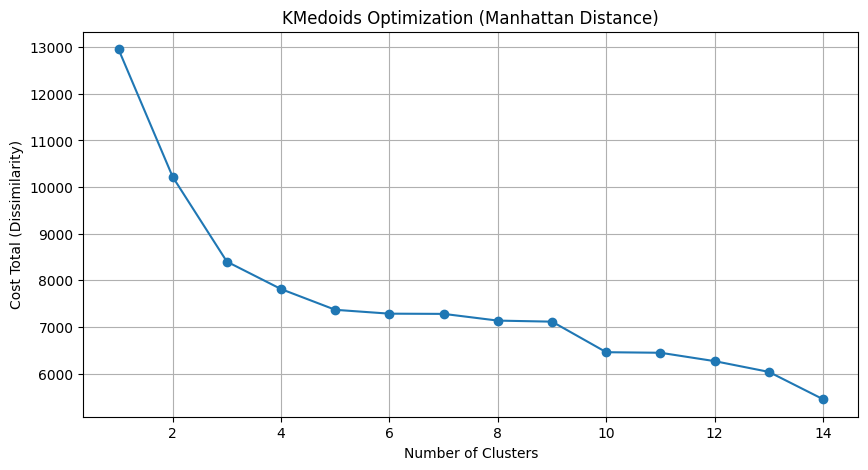

In [35]:
optimise_k_medoids(X_processed, 15)

In [27]:
from sklearn_extra.cluster import KMedoids


# Definir el número de clusters (puedes ajustar este valor)
n_clusters = 5

# Aplicar KMedoids con la distancia Manhattan
kmedoids = KMedoids(n_clusters=n_clusters, metric="manhattan", random_state=42)
kmedoids.fit(X_processed)

# Obtener las etiquetas de los clusters
labels = kmedoids.labels_

X_processed['K_Medoids_5'] = labels
X_processed

c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


,Age,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,K_Medoids_5
0,0.148936,0.5,0.666667,0.500000,0.000000,0.500000,0.320755,0.186567,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,0.148936,1.0,0.666667,1.000000,1.000000,0.000000,0.132075,0.126866,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,0.191489,0.5,0.666667,0.500000,0.666667,0.500000,0.660377,0.283582,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.276596,1.0,0.666667,0.500000,0.666667,0.000000,0.660377,0.358209,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,0.170213,0.5,0.000000,0.500000,0.000000,0.000000,0.622642,0.379104,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,1.0,0.666667,0.364070,0.558756,0.453124,0.491943,0.689616,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2107,0.169850,1.0,0.666667,0.502565,0.447130,0.299635,0.563366,0.707037,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2108,0.181362,1.0,0.666667,0.527097,0.471403,0.323144,0.570200,0.706637,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2109,0.220467,1.0,0.666667,0.926170,0.379702,0.293017,0.546132,0.704079,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3


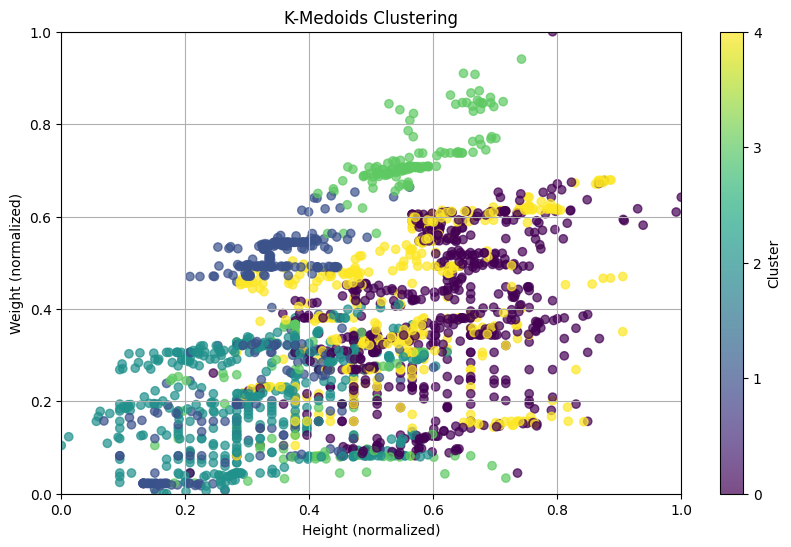

In [37]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
scatter = plt.scatter(
    x=X_processed['Height'],
    y=X_processed['Weight'],
    c=X_processed['K_Medoids_5'],
    cmap='viridis',
    alpha=0.7
)

# Limitar ejes
plt.xlim(0, 1)
plt.ylim(0, 1)

# Etiquetas y título
plt.title('K-Medoids Clustering')
plt.xlabel('Height (normalized)')
plt.ylabel('Weight (normalized)')

# Añadir la barra de colores con etiquetas discretas
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
cbar.set_ticks([0, 1, 2, 3, 4])  # Ajusta según el número de clústeres
cbar.set_ticklabels(['0', '1', '2', '3', '4'])

# Mostrar la gráfica
plt.grid(True)
plt.show()




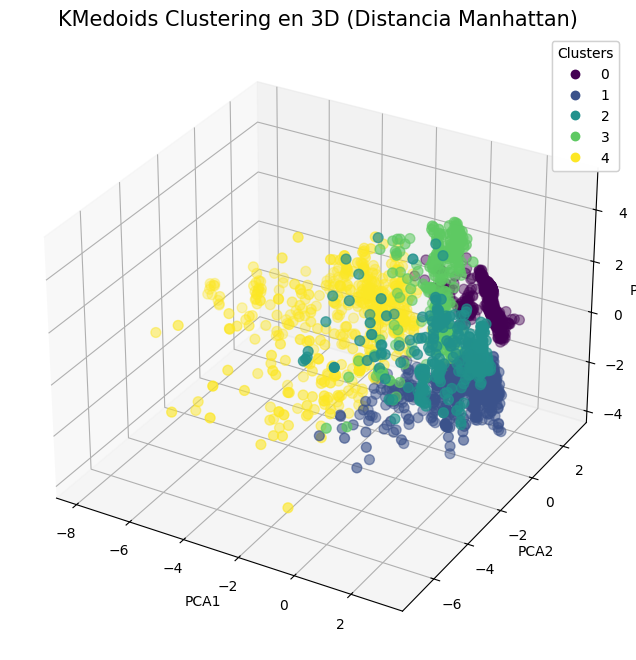

In [38]:
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Asumimos que X_processed ya está preprocesado y contiene las columnas necesarias

# Estándarizar los datos para PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Aplicar PCA para reducir a 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Definir el número de clusters (puedes ajustar este valor)
n_clusters = 5

# Aplicar KMedoids con la distancia Manhattan
kmedoids = KMedoids(n_clusters=n_clusters, metric="manhattan", random_state=42)
kmedoids.fit(X_pca)

# Obtener las etiquetas de los clusters
labels = kmedoids.labels_

# Añadir las etiquetas de los clusters a los datos procesados (usando PCA)
X_pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
X_pca_df["Cluster"] = labels

# Visualizar los clusters usando un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D, coloreados por las etiquetas del clustering
scatter = ax.scatter(X_pca_df["PCA1"], X_pca_df["PCA2"], X_pca_df["PCA3"], c=X_pca_df["Cluster"], cmap='viridis', s=50)

# Añadir un título y etiquetas
ax.set_title('KMedoids Clustering en 3D (Distancia Manhattan)', fontsize=15)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Añadir una barra de colores para las etiquetas de los clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Mostrar el gráfico
plt.show()


## PCA - Análisis de componentes principales

Se genera un análisis de componentes principales sin tener en cuenta las variables altura y peso, ya que estas explican los niveles de obesidad en alta medida. Tampoco se toman en cuentan las variables categóricas.

In [43]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

# fetch dataset 
obesidad = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = obesidad.data.features 
y = obesidad.data.targets 

# añadir columna IMC

X["IMC"] = X["Weight"] / (X["Height"] ** 2)

# eliminar las columnas 'Height' y 'Weight' de X
X = X.drop(columns=["Height", "Weight"])

X.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
IMC                               float64
dtype: object

In [45]:
# Primero seleccionamos las columnas numéricas de X
numerical_cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE", "IMC"]

# Crear una instancia del MinMaxScaler
scaler = StandardScaler()

# Aplicar MinMaxScaler a las columnas numéricas
X_scaled = scaler.fit_transform(X[numerical_cols])

# Crear un DataFrame con los datos escalados
X_final = pd.DataFrame(X_scaled, columns=numerical_cols)


# Mostrar el DataFrame final con los datos escalados
print(X_final.head())

        Age      FCVC       NCP      CH2O       FAF       TUE       IMC
0 -0.522124 -0.785019  0.404153 -0.013073 -1.188039  0.561997 -0.663421
1 -0.522124  1.088342  0.404153  1.618759  2.339750 -1.080625 -0.681937
2 -0.206889 -0.785019  0.404153 -0.013073  1.163820  0.561997 -0.740967
3  0.423582  1.088342  0.404153 -0.013073  1.163820 -1.080625 -0.355619
4 -0.364507 -0.785019 -2.167023 -0.013073 -1.188039 -1.080625 -0.169522


  Componente  Varianza Explicada  Varianza Acumulada
0        PC1            0.227860            0.227860
1        PC2            0.186845            0.414706
2        PC3            0.144214            0.558920
3        PC4            0.134900            0.693820
4        PC5            0.127003            0.820822


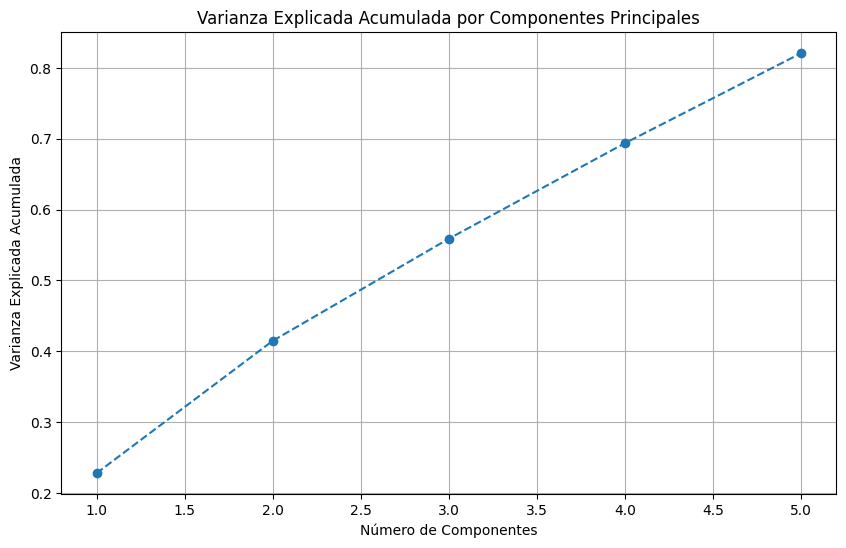

In [50]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA a los datos escalados
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_final)  # X_final es el DataFrame con las columnas numéricas escaladas

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_variance = explained_variance.cumsum()

# Crear un DataFrame para mostrar la varianza explicada y acumulada de manera bonita
variance_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza Explicada': explained_variance,
    'Varianza Acumulada': cumulative_variance
})

# Mostrar la tabla de varianza explicada y acumulada
print(variance_df)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()



## MODELO DE ML: GRADIENT BOOSTING

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ahora que tenemos el PCA aplicado, dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(report)


c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6856

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.73      0.79      0.76        56
      Normal_Weight       0.55      0.45      0.50        62
     Obesity_Type_I       0.69      0.67      0.68        78
    Obesity_Type_II       0.80      0.90      0.85        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.54      0.61      0.57        56
Overweight_Level_II       0.37      0.34      0.35        50

           accuracy                           0.69       423
          macro avg       0.67      0.68      0.67       423
       weighted avg       0.68      0.69      0.68       423



In [58]:
# Guardamos el pipeline completo (preprocesamiento + modelo entrenado)
dump(gb_model, 'model_pipeline_gb.joblib')

['model_pipeline_gb.joblib']

In [57]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Configurar los hiperparámetros para la optimización
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [2, 5, 10] # Profundidad máxima de los árboles
}

# Configurar el GridSearchCV para optimizar los hiperparámetros
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Hacer predicciones con el mejor modelo encontrado
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\juell\.conda\envs\Obesidad\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.6572

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.73      0.77        56
      Normal_Weight       0.62      0.48      0.55        62
     Obesity_Type_I       0.65      0.65      0.65        78
    Obesity_Type_II       0.81      0.74      0.77        58
   Obesity_Type_III       1.00      0.95      0.98        63
 Overweight_Level_I       0.43      0.54      0.48        56
Overweight_Level_II       0.37      0.46      0.41        50

           accuracy                           0.66       423
          macro avg       0.67      0.65      0.66       423
       weighted avg       0.68      0.66      0.66       423

